# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [157]:
import json
import requests
import os


import requests as req

import pandas as pd
import math as math
import time
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress
from citipy import citipy
api_key = "4f1b0e54c7b3f13059687c88c9e9702d"
temp_units = "imperial"

## Generate Cities List

In [158]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities_count = len(cities)
print(cities_count)

639


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [159]:
print('Beginning Data Retrieval')
print('---------------------')
counter = 1
df = pd.DataFrame(columns=['City','Lat','Lan','Temp_max', 'Hum','Cloudness','WindSpeed','Country','Date'])
#                   ,'Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
for city in cities:

    counter += 1  

    city_url = base_url + '&q=' + city.replace(' ','+')

    r = requests.get(city_url)
    if r:
        data = r.json()
#         print(data)
        lat = data['coord']['lat']
        lan = data['coord']['lon']
        hum = data['main']['humidity']
        tmp_m = data['main']['temp_max']
        cloud = data['clouds']['all']
        WS = data['wind']['speed']
        Cntry = data['sys']['country']
        Dt = data['dt']
        df.loc[counter] = [city, lat, lan,tmp_m, hum, cloud, WS,Cntry, Dt]
    else:
        print("The city is not on the list.")
print('---------------------')
print('Data Retrieval Complete')
print(f"There are {counter-1} records.")

Beginning Data Retrieval
---------------------
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the list.
The city is not on the li

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [160]:
# Export the City_Data into a csv
df.to_csv(output_data_file, index_label="City_ID")
df.head()


,City,Lat,Lan,Temp_max,Hum,Cloudness,WindSpeed,Country,Date
2,port hawkesbury,45.6169,-61.3485,44.60,93,90,3.44,CA,1617249425
3,atuona,-9.8000,-139.0333,80.92,78,69,13.33,PF,1617249425
4,luderitz,-26.6481,15.1594,66.60,59,0,11.95,NA,1617249426
5,kilindoni,-7.9139,39.6668,80.15,80,100,16.93,TZ,1617249426
6,new norfolk,-42.7826,147.0587,80.01,30,99,7.00,AU,1617249426


In [161]:
df.count()

City         589
Lat          589
Lan          589
Temp_max     589
Hum          589
Cloudness    589
WindSpeed    589
Country      589
Date         589
dtype: int64

In [139]:
df.describe()

,Lat,Lan,Temp_max,WindSpeed
count,585.000000,585.000000,585.000000,585.000000
mean,20.462995,18.500762,57.556120,8.236632
std,32.976945,90.433601,23.924547,5.769514
min,-54.800000,-175.200000,-20.560000,0.400000
25%,-8.103000,-65.222600,39.200000,4.070000
50%,23.451700,23.533300,63.050000,6.910000
75%,48.687600,97.400000,77.000000,11.160000
max,78.218600,179.316700,100.400000,46.040000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [162]:
#  Get the indices of cities that have humidity over 100%.
df_dirty = df[(df["Hum"] > 100)].index
df_dirty

Int64Index([], dtype='int64')

In [163]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df = df.drop(df_dirty, inplace=False)
df.head()

,City,Lat,Lan,Temp_max,Hum,Cloudness,WindSpeed,Country,Date
2,port hawkesbury,45.6169,-61.3485,44.60,93,90,3.44,CA,1617249425
3,atuona,-9.8000,-139.0333,80.92,78,69,13.33,PF,1617249425
4,luderitz,-26.6481,15.1594,66.60,59,0,11.95,NA,1617249426
5,kilindoni,-7.9139,39.6668,80.15,80,100,16.93,TZ,1617249426
6,new norfolk,-42.7826,147.0587,80.01,30,99,7.00,AU,1617249426


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

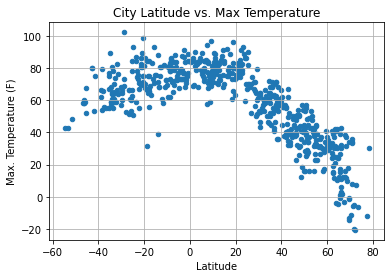

In [164]:
#Latitude vs. Temperature Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Temp_max"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

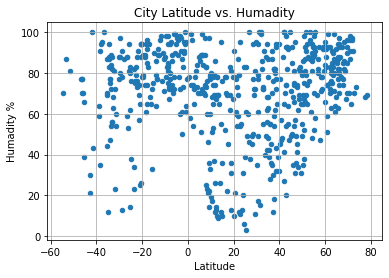

In [165]:
#Latitude vs. Humadity Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Hum"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humadity")
plt.ylabel("Humadity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Humadity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

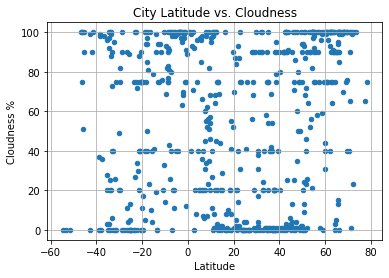

In [166]:
#Latitude vs. Cloudiness Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Cloudness"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudness")
plt.ylabel("Cloudness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Cloudness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

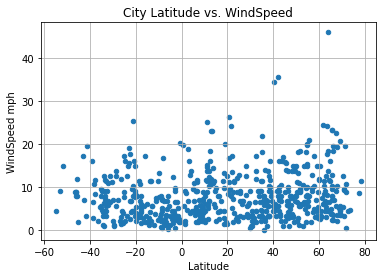

In [167]:
#Latitude vs. Wind Speed Plot

# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["WindSpeed"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. WindSpeed")
plt.ylabel("WindSpeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_data/Windspeed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [168]:
#Seprate Northern and Soutnern Hemispheres
N_df = df.loc[(df["Lat"] >= 0)]
S_df = df.loc[(df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.798768352448925


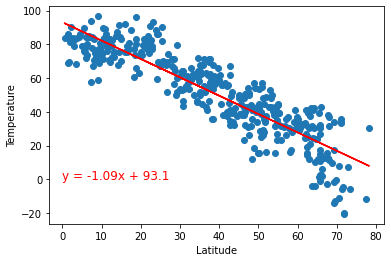

In [169]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = N_df["Lat"]
y_values = N_df["Temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.22563829568720997


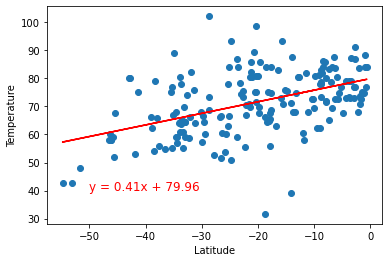

In [170]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = S_df["Lat"]
y_values = S_df["Temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [171]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = N_df["Lat"]
y_values = N_df["Hum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [172]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = S_df["Lat"]
y_values = S_df["Hum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humadity')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [173]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = N_df["Lat"]
y_values = N_df["Cloudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudness')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [174]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values =S_df["Lat"]
y_values =S_df["Cloudness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudness')
print(f"The r-value is: {rvalue**2}")
plt.show()

AttributeError: 'float' object has no attribute 'shape'

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.005775504459255939


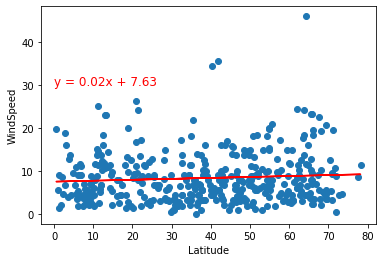

In [175]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = N_df["Lat"]
y_values = N_df["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07568838371606716


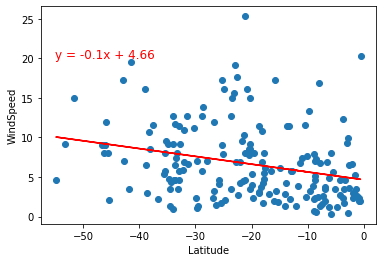

In [176]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = S_df["Lat"]
y_values = S_df["WindSpeed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
print(f"The r-value is: {rvalue**2}")
plt.show()